<a href="https://colab.research.google.com/github/nhattan206/AI_project/blob/main/MNIST(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from IPython.core.pylabtools import figsize
# Nhận diện chữ số
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
import numpy as np
from keras.backend import conv2d

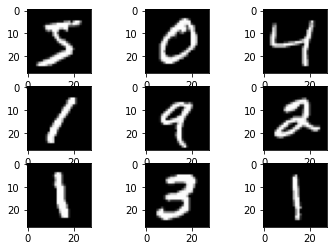

In [16]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i],cmap = plt.get_cmap('gray'))
plt.show()

In [17]:
# Reshape lại dữ liệu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255 #255 là giá trị lớn nhất của x train và x test
x_test/=255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [18]:
#Tạo mô hình CNN
model=Sequential()
#Block 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer = 'he_uniform',padding='same',input_shape=(28,28,1)))
 #32 sau conv2d là số lần học vs kích thước 3x3 của kernel, input shape là 32x32, 3 kênh màu
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
#Block 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer = 'he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
#Block 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer = 'he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
#Add ANN
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [19]:
#Bien Dich
opt=SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test),verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
469/469 [==============================] - 17s 13ms/step - loss: 0.3345 - accuracy: 0.8965 - val_loss: 0.0428 - val_accuracy: 0.9857
Epoch 2/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0493 - accuracy: 0.9845 - val_loss: 0.0366 - val_accuracy: 0.9882
Epoch 3/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0326 - accuracy: 0.9894 - val_loss: 0.0242 - val_accuracy: 0.9916
Epoch 4/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0222 - accuracy: 0.9931 - val_loss: 0.0351 - val_accuracy: 0.9886
Epoch 5/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0170 - accuracy: 0.9945 - val_loss: 0.0366 - val_accuracy: 0.9891
Epoch 6/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0133 - accuracy: 0.9957 - val_loss: 0.0276 - val_accuracy: 0.9907
Epoch 7/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0113 - accuracy: 0.9964 - val_loss: 0.0270 - val_accuracy

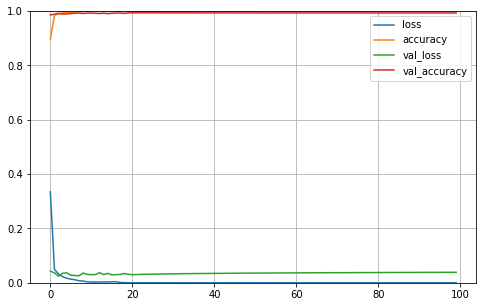

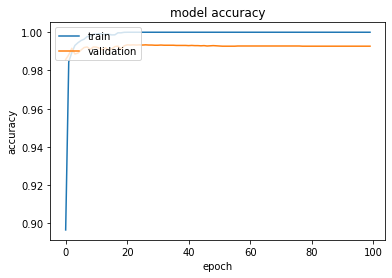

In [20]:
#Ve do thi
pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()